In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from climada.entity import Exposures
from climada.hazard import Hazard
from climada.engine import Impact
import climada.util.lines_polys_handler as u_lp

In [2]:
SHP_DIR = '../data/boundaries/Sindh_admin2_delineated/'

SHP_FILE = SHP_DIR + '/{admin2_name}/{admin2_name_lowercase}.shp'

imp_file = './Sindh_displacement_stats.xlsx'

In [3]:
df_imp = pd.read_excel(imp_file)
df_imp_extract = df_imp.iloc[:,:4]
df_imp_extract

,Sindh_admin2,total_pop,PDMA_displaced,pct_displaced
0,KARACHI,1.524999e+07,508,0.003331
1,DADU,1.761593e+06,804271,45.655902
2,BADIN,1.714075e+06,32278,1.883115
3,JAMSHORO,9.200466e+05,263286,28.616595
4,LARKANA,1.596218e+06,1071333,67.116939
5,JACOBABAD,1.187198e+06,256584,21.612568
6,KAMBER,1.469491e+06,390245,26.556481
7,THATTA,9.044465e+05,137236,15.173479
8,HYDERABAD,2.379693e+06,33700,1.416149
9,KHAIPUR,2.477118e+06,1218177,49.177194


In [7]:
admin2_shp = None

for idx, admin2_name in enumerate(df_imp_extract.Sindh_admin2):
    if admin2_shp is None:
        admin2_shp = gpd.read_file(SHP_FILE.format(admin2_name=admin2_name, 
                                                   admin2_name_lowercase=admin2_name.lower()))
    else:
        temp_admin2_shp = gpd.read_file(SHP_FILE.format(admin2_name=admin2_name, 
                                                   admin2_name_lowercase=admin2_name.lower()))
        admin2_shp = pd.concat([admin2_shp, temp_admin2_shp])

In [8]:
gdf_imp = gpd.GeoDataFrame(df_imp_extract, geometry=admin2_shp['geometry'].values, crs="EPSG:4326")

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

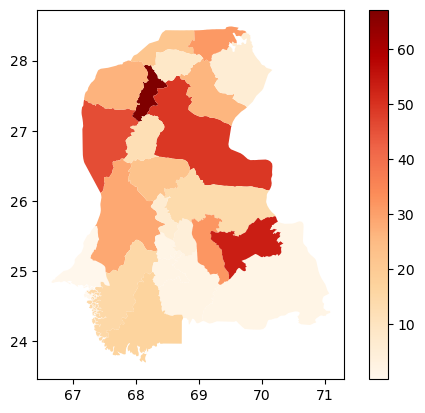

In [9]:
import matplotlib.pyplot as plt
ax = gdf_imp.plot('pct_displaced', legend=True, cmap='OrRd')